In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle
import re
import os
from urllib.request import urlopen
from PIL import Image

In [2]:
import nltk.corpus
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [4]:
train=pd.read_csv("train.csv")

In [6]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [7]:
train["tweet"][31960]

'@user #sikh #temple vandalised in in #calgary, #wso condemns  act  '

In [8]:
train=train.drop("id",axis=1)

# 1--> means hate speech
# 0--> means not a hate speech

In [9]:
train

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [10]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

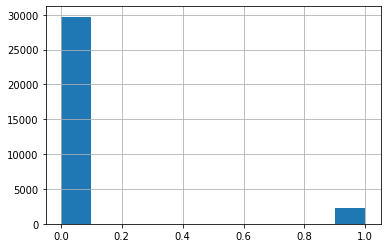

In [11]:
#PLOTTING HISTOGRAM
train['label'].hist()
plt.show()

Our dataset is imbalanced, so just to balance it we loaded many dataset and combined the datasets so that we get a balanced data set containing nearly equal number of both the classes

In [12]:
train2=pd.read_csv("labeled_data.csv")

In [13]:
train2

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [14]:
train2["class"].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

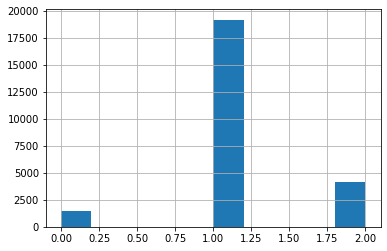

In [15]:
#PLOTTING HISTOGRAM
train2['class'].hist()
plt.show()

this dataset contains three levels of hate speech level 0,1,2
We have added all hate tweets to our existing data so that we can get a balanced data

In [16]:
train2["label"]=1

In [17]:
train2

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,label
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,1
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",1
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,1


In [18]:
train2 = pd.DataFrame(train2[['label',"tweet"]])

In [19]:
train2

,label,tweet
0,1,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,1,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [20]:
#Concatinating both dataframes
result = pd.concat([train,train2])

<AxesSubplot:>

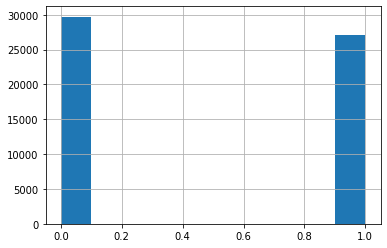

In [21]:
# shuffling data and reseting index
result=shuffle(result)
result = result.reset_index(drop=True)

#Plotting histogram
result['label'].hist()

In [22]:
result

,label,tweet
0,0,blossom #love #adopt #baby #blessings #cute #c...
1,1,fair &amp; lovely effect...
2,1,slut. specky. albino lesbo. wannabe player. dw...
3,0,life is good. especially when @user tweets you...
4,0,â­ï¸miss you ðâ¨painting for them - cre...
...,...,...
56740,1,This guy is 100% retarded.
56741,0,happy with my new clothes ðððâ¤ð ...
56742,0,i am free. #i_am #positive #affirmation
56743,1,I'm a bad bitch!


In [23]:
result["tweet"][56744]

'Posted a new song: ""guala"" http://t.co/jq3RB6gyQh #music'

In [24]:
#checking for null values
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   56745 non-null  int64 
 1   tweet   56745 non-null  object
dtypes: int64(1), object(1)
memory usage: 886.8+ KB


In [25]:
# Storing stopwords of english language from nltk library
sw = set(stopwords.words("english"))

In [26]:
# remove stop words
def filter_words(word_list):
    useful_words = [ w for w in word_list if w not in sw ]
    return(useful_words)

In [27]:
def preprocess_data(dataset):
    data = dataset.copy()
    data['tl'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in li]) for li in data['tweet']]
    
    useful_tweet_li=[]
    for text in data['tl']:
        word_list = word_tokenize(text)
        text=filter_words(word_list)
        sent=''
        for  word in text:
            sent += str(word) + ' '
        useful_tweet_li.append(sent)  

    data['cleaned_tweets'] = useful_tweet_li
    
    #Using TF-IDF vectorizer
    vect = TfidfVectorizer(ngram_range = (1,3)).fit(data['cleaned_tweets'])
    
    #Transforming our data using the vector trained on training data.  
    vectorized_tweets = vect.transform(data['cleaned_tweets'])
    
    return vectorized_tweets, vect

In [28]:
#storing preprocessed data in data_train and vector in vect
data_train,vect  = preprocess_data(result)

In [29]:
data_target = np.array(result["label"])

In [30]:
data_target

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [31]:
print(data_train.shape, data_target.shape)

(56745, 702295) (56745,)


In [32]:
data_train[0].toarray()[0].shape

(702295,)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data_train, data_target, test_size=0.2, random_state=44)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(45396, 702295) (45396,) (11349, 702295) (11349,)


In [34]:
X_train[0].toarray()[0].shape

(702295,)

In [35]:
# we are using logistic regression  
lg_reg_clf = LogisticRegression(C=50)

In [36]:
model = lg_reg_clf.fit(X_train, y_train)

C:\Users\narendra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
print("Accuracy   :\t",lg_reg_clf.score(X_test,y_test))

Accuracy   :	 0.9583223191470615


In [38]:
def preprocess(dataset,vect):
    data = dataset.copy()
    data['tl'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in li]) for li in data['Tweet']]
    
    useful_tweet=[]
    for text in data['tl']:
        word_list = word_tokenize(text)
        text=filter_words(word_list)
        sent=""
        for word in text:
            sent=sent+str(word)+" "
        useful_tweet.append(sent)

    data['cleaned_tweets'] = useful_tweet
    
    #Transforming our data using the vector trained on training data.  
    vectorized_tweets = vect.transform(data['cleaned_tweets'])
    
    return vectorized_tweets

In [39]:
dff=pd.read_csv("idnvsnz.csv")

In [40]:
dff

,Unnamed: 0,Date,User,Tweet
0,0,2022-11-28 15:52:08+00:00,WalkingWicket2,#TeamIndia has tried as many as 44 players in ...
1,1,2022-11-28 15:51:58+00:00,pawa_1008,#TeamIndia has tried as many as 44 players in ...
2,2,2022-11-28 15:50:15+00:00,RoyShashwat004,#TeamIndia has tried as many as 44 players in ...
3,3,2022-11-28 15:46:21+00:00,daniel86cricket,Will rain save Team36 from another defeat in t...
4,4,2022-11-28 15:43:49+00:00,CricTelegraph,Shikhar Dhawan 😂 \n\n#YuzvendraChahal #Dhanash...
...,...,...,...,...
995,995,2022-11-27 05:55:19+00:00,PoppingCreaseSA,"The rain finally stopped, but it's now a 29 ov..."
996,996,2022-11-27 05:54:49+00:00,BSharan_6,Kiwis dismissed Shikhar Dhawan for just 3 in 1...
997,997,2022-11-27 05:54:12+00:00,BizzPun,"U want this cramped dhawan, just because he is..."
998,998,2022-11-27 05:53:32+00:00,Team36i,India's selection process has to be one of the...


In [41]:
vt=preprocess(dff,vect)

In [42]:
l=lg_reg_clf.predict(vt)

In [43]:
dff["label"]=l

In [60]:
dff

,Unnamed: 0,Date,User,Tweet,label
0,0,2022-11-28 15:52:08+00:00,WalkingWicket2,#TeamIndia has tried as many as 44 players in ...,1
1,1,2022-11-28 15:51:58+00:00,pawa_1008,#TeamIndia has tried as many as 44 players in ...,1
2,2,2022-11-28 15:50:15+00:00,RoyShashwat004,#TeamIndia has tried as many as 44 players in ...,1
3,3,2022-11-28 15:46:21+00:00,daniel86cricket,Will rain save Team36 from another defeat in t...,1
4,4,2022-11-28 15:43:49+00:00,CricTelegraph,Shikhar Dhawan 😂 \n\n#YuzvendraChahal #Dhanash...,1
...,...,...,...,...,...
995,995,2022-11-27 05:55:19+00:00,PoppingCreaseSA,"The rain finally stopped, but it's now a 29 ov...",0
996,996,2022-11-27 05:54:49+00:00,BSharan_6,Kiwis dismissed Shikhar Dhawan for just 3 in 1...,0
997,997,2022-11-27 05:54:12+00:00,BizzPun,"U want this cramped dhawan, just because he is...",0
998,998,2022-11-27 05:53:32+00:00,Team36i,India's selection process has to be one of the...,1


In [61]:
dff.to_csv('myfile.csv', index = False, encoding='utf-8')

In [59]:
lolll=pd.read_csv("myfile.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'myfile.csv'

In [58]:
lolll

,Unnamed: 0,Date,User,Tweet,label
0,0,2022-11-28 15:52:08+00:00,WalkingWicket2,#TeamIndia has tried as many as 44 players in ...,1
1,1,2022-11-28 15:51:58+00:00,pawa_1008,#TeamIndia has tried as many as 44 players in ...,1
2,2,2022-11-28 15:50:15+00:00,RoyShashwat004,#TeamIndia has tried as many as 44 players in ...,1
3,3,2022-11-28 15:46:21+00:00,daniel86cricket,Will rain save Team36 from another defeat in t...,1
4,4,2022-11-28 15:43:49+00:00,CricTelegraph,Shikhar Dhawan 😂 \n\n#YuzvendraChahal #Dhanash...,1
...,...,...,...,...,...
995,995,2022-11-27 05:55:19+00:00,PoppingCreaseSA,"The rain finally stopped, but it's now a 29 ov...",0
996,996,2022-11-27 05:54:49+00:00,BSharan_6,Kiwis dismissed Shikhar Dhawan for just 3 in 1...,0
997,997,2022-11-27 05:54:12+00:00,BizzPun,"U want this cramped dhawan, just because he is...",0
998,998,2022-11-27 05:53:32+00:00,Team36i,India's selection process has to be one of the...,1


In [49]:
lolll["label"].value_counts()

1    619
0    381
Name: label, dtype: int64

In [50]:
df=pd.read_csv("train mem.csv")

In [51]:
df

,Unnamed: 0,image_url,humour,sarcastic,offensive,motivational,overall,ocr
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,twisted_meaning,not_offensive,not_motivational,neutral,Relationship status.\nSingle\nMarried\nIt's co...
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,twisted_meaning,slight,not_motivational,neutral,Bernie or REAGAN?\nBe informed. Compare them o...
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,not_offensive,not_motivational,positive,I HEAR SOMETHING\nBetter run a mile\nOMG RAJ?\...
3,3,https://preview.redd.it/iwcz3o2niix61.jpg?widt...,very_funny,twisted_meaning,not_offensive,not_motivational,positive,Redditors Visiting IG memepages\n*dies from cr...
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,not_funny,not_sarcastic,very_offensive,not_motivational,negative,"Samajh nahi aaya Par sun ke acabo,\nBUDGET SPE..."
...,...,...,...,...,...,...,...,...
6995,6995,https://preview.redd.it/3c7iiijlg9d61.jpg?widt...,hilarious,general,slight,not_motivational,negative,$14 y/o nibbi*\n*16 y/o nibba*\n*20 y/o single...
6996,6996,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,very_twisted,hateful_offensive,not_motivational,negative,I DON'T HAVE A PROBLEM WITH\nIMMIGRATION\nIF W...
6997,6997,https://encrypted-tbn0.gstatic.com/images?q=tb...,hilarious,not_sarcastic,not_offensive,not_motivational,positive,"Como umbalin\nHey Alia,\nWhat is the\nOpposite..."
6998,6998,https://encrypted-tbn0.gstatic.com/images?q=tb...,hilarious,general,very_offensive,motivational,negative,baby kya kr rhe ho?\ntumhara favorite football...


In [52]:
df["humour"].value_counts()

funny         3393
very_funny    2038
not_funny     1010
hilarious      559
Name: humour, dtype: int64

In [53]:
df1=df.loc[df["humour"]=="very_funny"]

In [54]:
df1=df1[["image_url"]]

In [55]:
df1

,image_url
0,https://encrypted-tbn0.gstatic.com/images?q=tb...
1,https://encrypted-tbn0.gstatic.com/images?q=tb...
3,https://preview.redd.it/iwcz3o2niix61.jpg?widt...
21,https://preview.redd.it/ensuiwr59uy61.jpg?widt...
22,https://preview.redd.it/ikhbf3gqz2u51.jpg?widt...
...,...
6987,https://encrypted-tbn0.gstatic.com/images?q=tb...
6988,https://encrypted-tbn0.gstatic.com/images?q=tb...
6990,http://www.scrolldroll.com/wp-content/uploads/...
6991,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [56]:
classes=["not a hate speech","hate speech"]

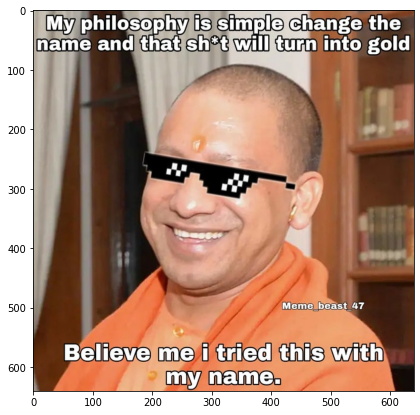

In [57]:
lol=["hate"]
lol=pd.DataFrame(lol,columns=["Tweet"])
vt=preprocess(lol,vect)
l=lg_reg_clf.predict(vt)
if l[0]==1:
    plt.figure(figsize=(10,7))
    i=np.random.randint(1,len(df1))
    img=Image.open(urlopen(df["image_url"][i]))
    plt.imshow(img)
else:
    plt.figure(figsize=(10,10))
    i=np.random.randint(1,len(df))
    img=Image.open(urlopen(df["image_url"][i]))
    plt.imshow(img)

In [80]:
with open('model.pkl','wb') as f:
    pickle.dump(lg_reg_clf,f)

In [81]:
with open('vector.pkl','wb') as f:
    pickle.dump(vect,f)